In [1]:
# Basic
import numpy as np
import pandas as pd
from warnings import filterwarnings
from collections import Counter

# Visualizations Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as pyo
import plotly.express as px
import plotly.graph_objs as go
pyo.init_notebook_mode()
import plotly.figure_factory as ff
import missingno as msno

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split

# Modelling Libraries
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Evaluation & CV Libraries
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold

In [2]:
import gdown

url = 'https://drive.google.com/uc?id=1k9XUm5T01n2ut58AjAsoQ2WxEExGadFc'

output = 'water_potabililty.csv'
gdown.download(url, output, quiet = True)



'water_potabililty.csv'

In [3]:
main_dataframe = pd.read_csv("/content/water_potabililty.csv")
axial_dataframe = main_dataframe.copy()
axial_dataframe.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [4]:
print(axial_dataframe.shape)
print("\n")
print(axial_dataframe.columns)

(3276, 10)


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')


In [5]:
axial_dataframe.count()
print("\n")
axial_dataframe.describe()

ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     0.780382     0.487849  
min      181.483754        2.200000         0.738000     1.450000     0.000000  
25%      365.734414       12.065801        55.844536     3.439711     0.000000  
50%      421.884968       14.218338        66.622485     3.955028     0.000000  
75%      481.792304       16.557652        77.337473     4.500320     1.000000  
max      753.342620       28.300000       124.000000     6.739000     1.000000

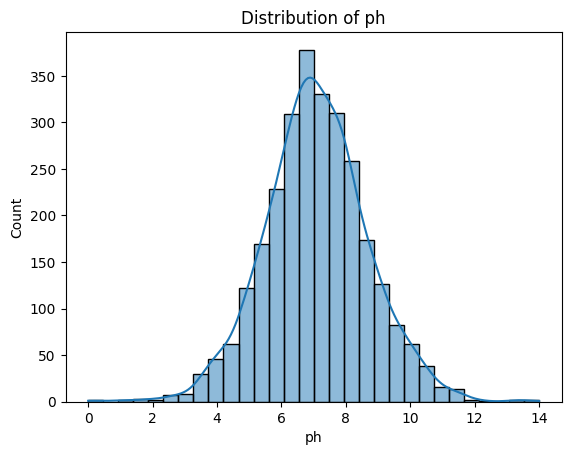

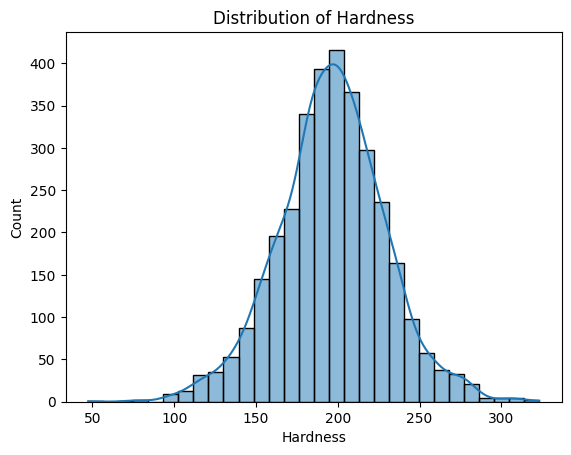

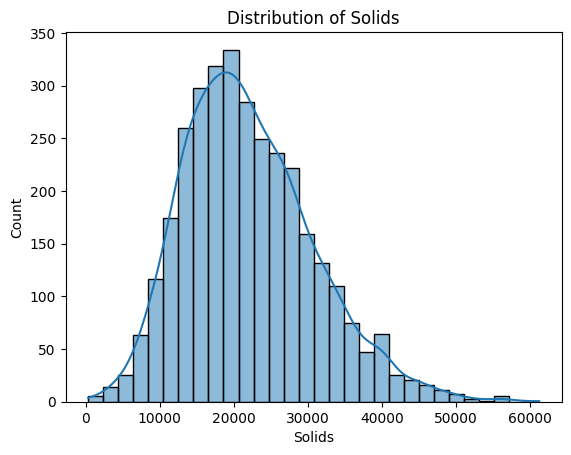

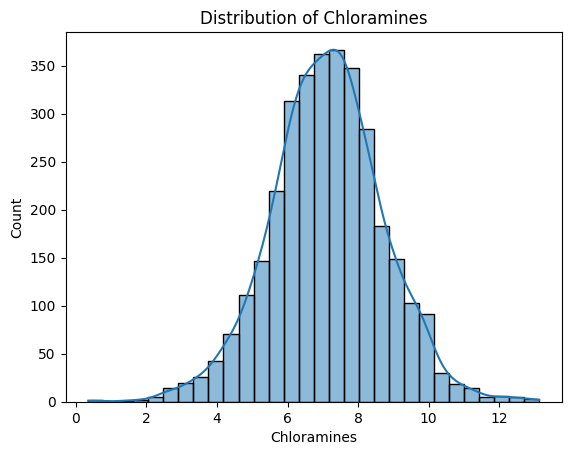

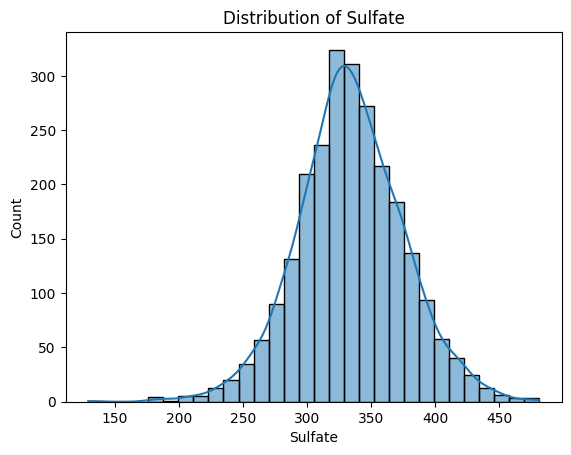

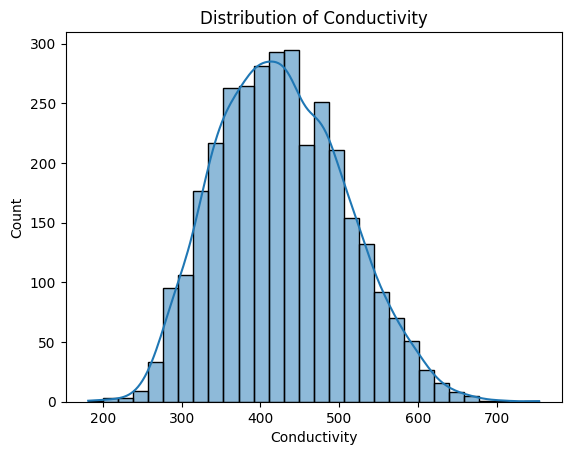

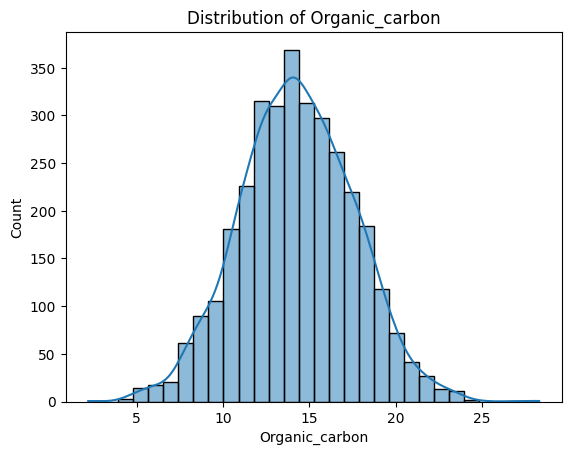

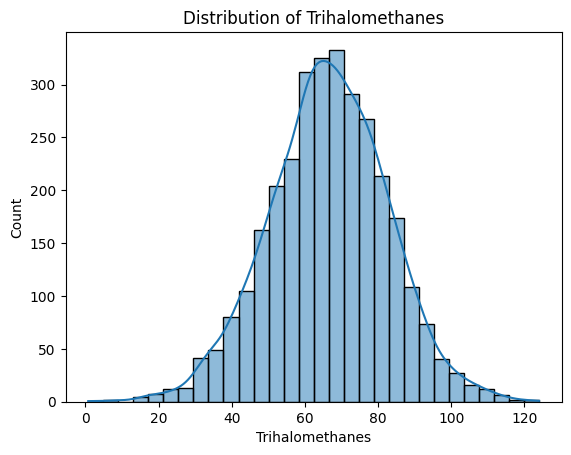

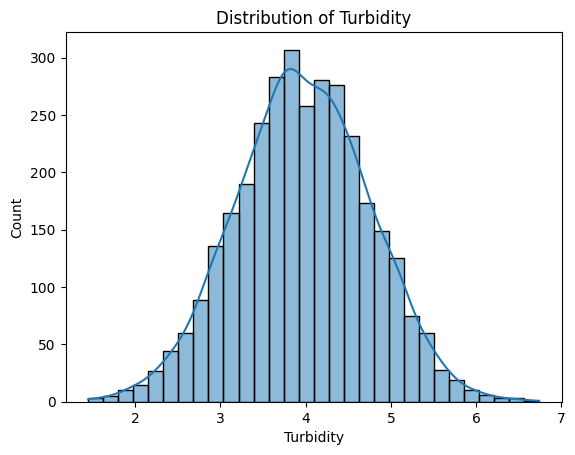

In [6]:
numerical_columns = ['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
                     'Organic_carbon', 'Trihalomethanes', 'Turbidity']

for col in numerical_columns:
    sns.histplot(axial_dataframe[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.show()

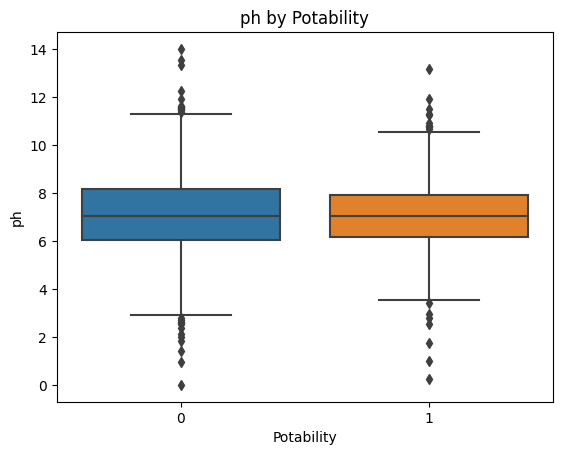

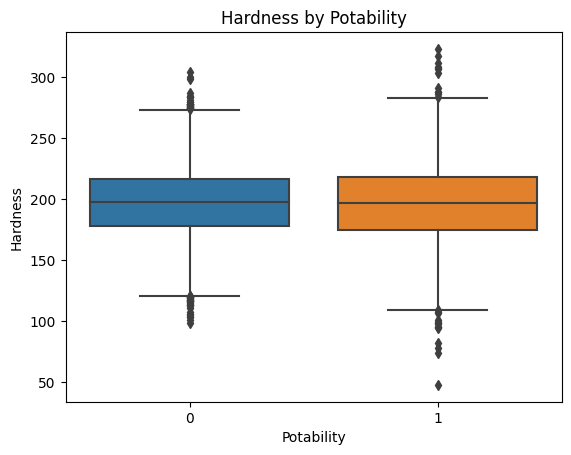

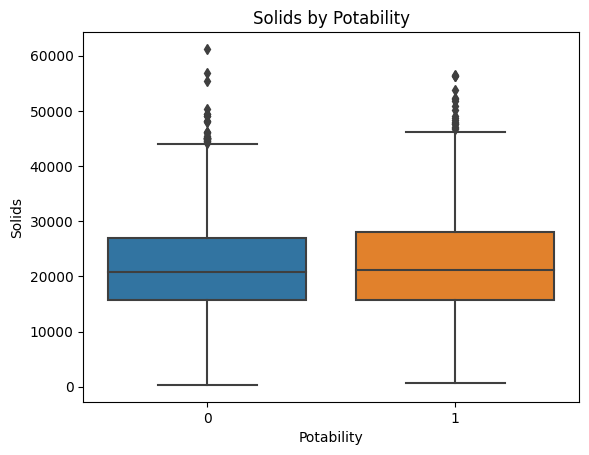

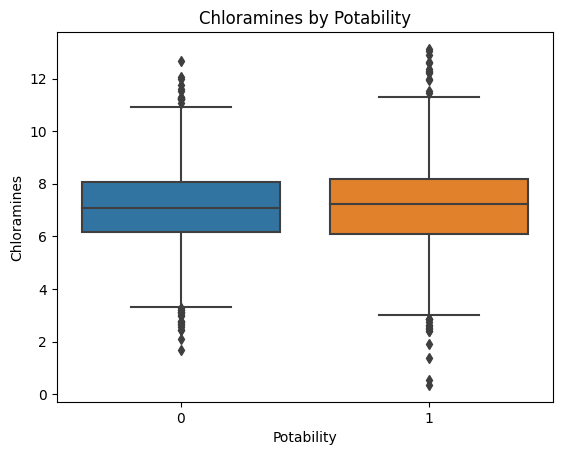

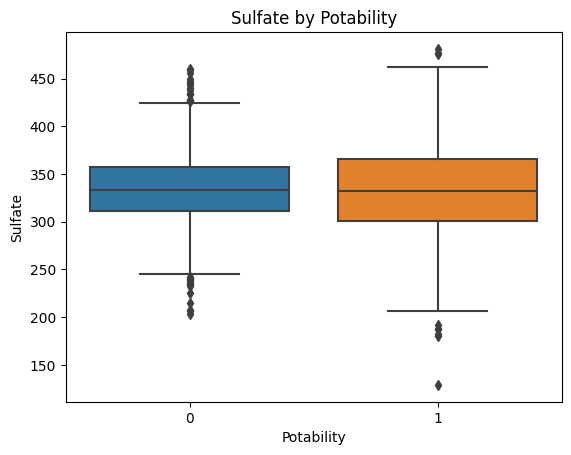

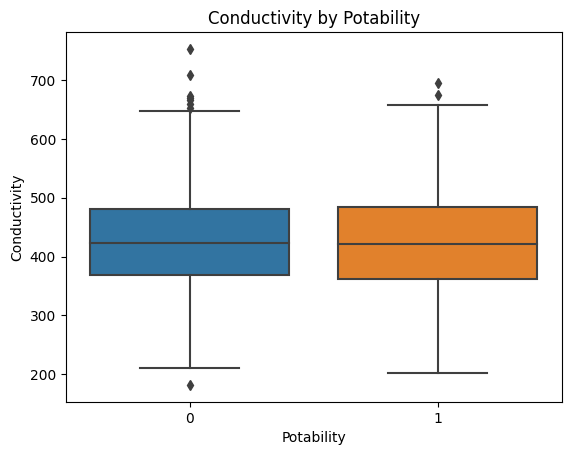

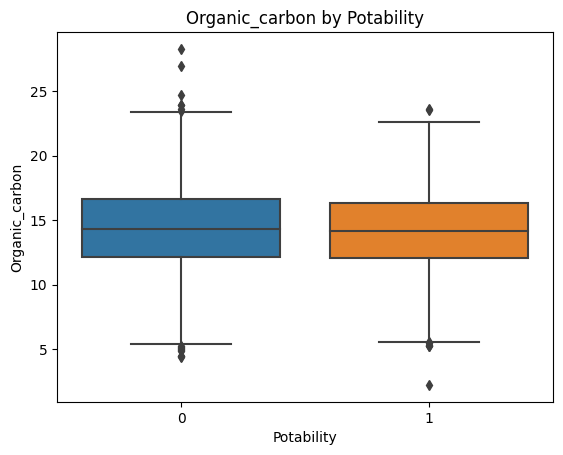

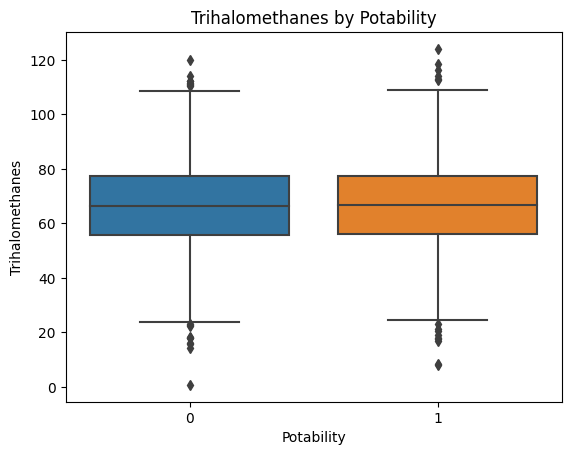

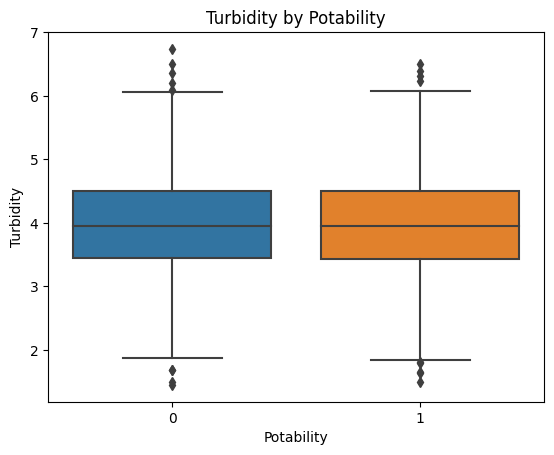

In [7]:
for col in numerical_columns:
    sns.boxplot(x='Potability', y=col, data=axial_dataframe)
    plt.title(f'{col} by Potability')
    plt.show()

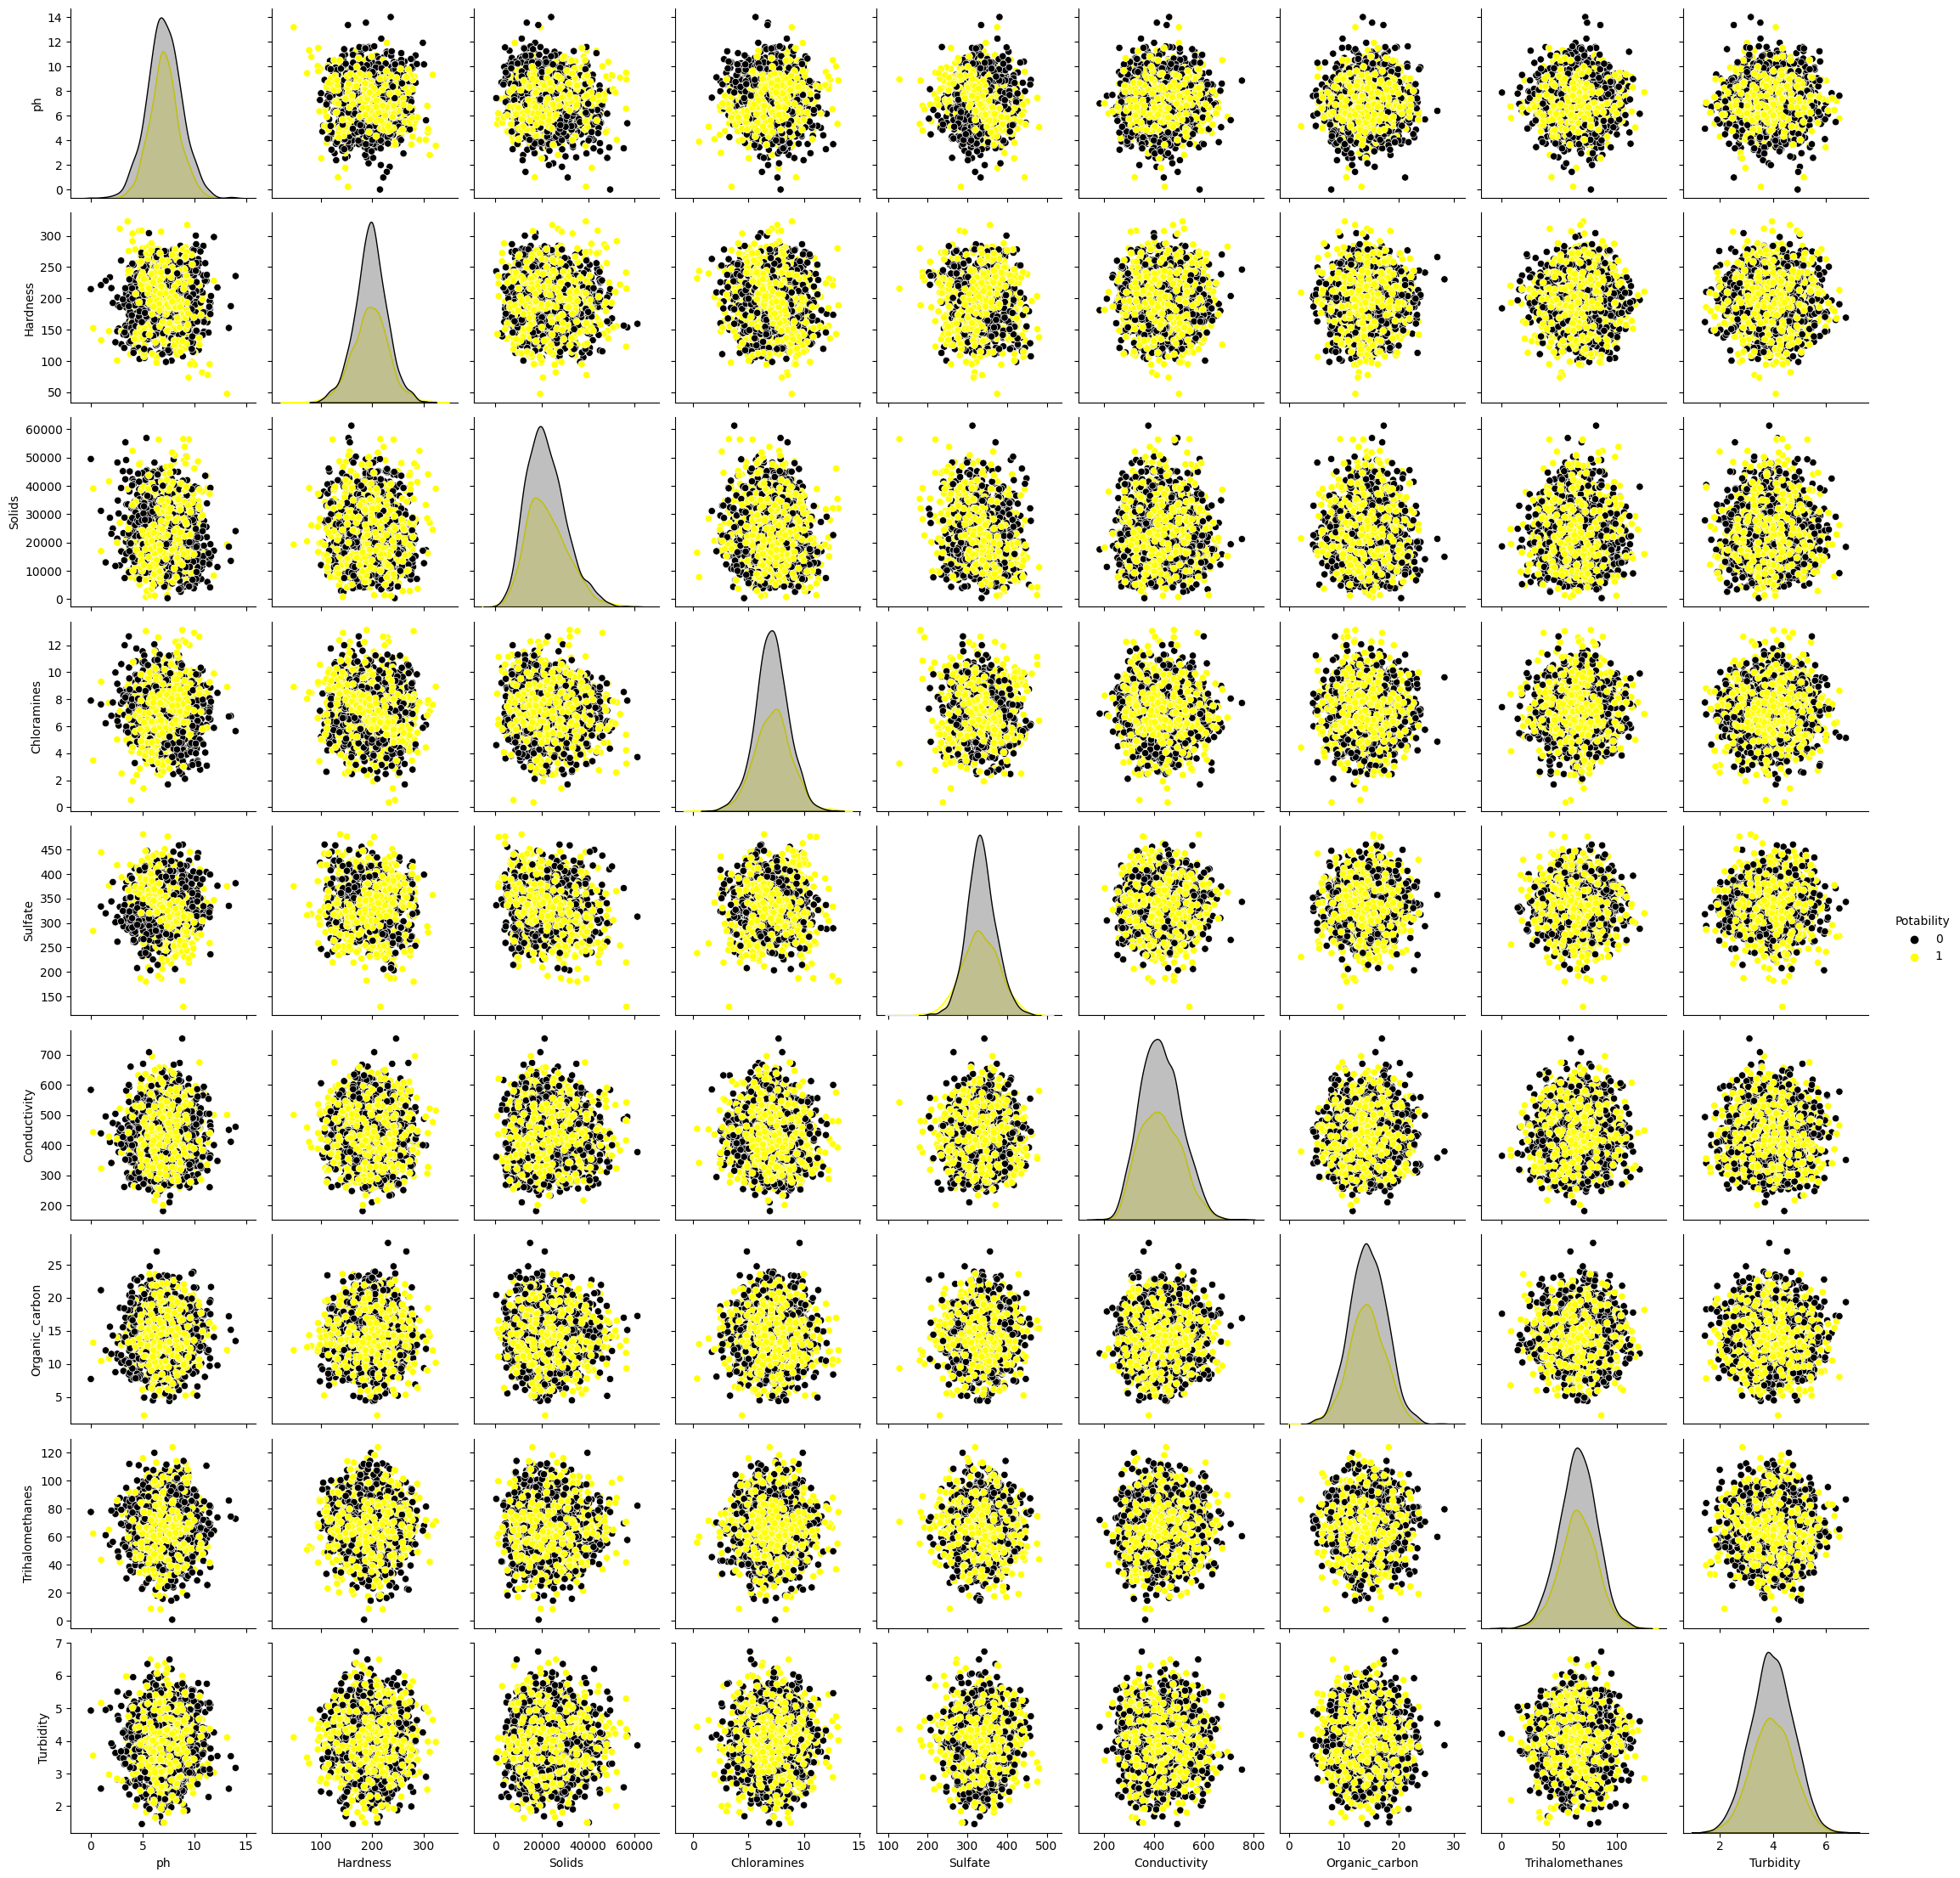

In [8]:
sns.pairplot(axial_dataframe, hue='Potability', palette=['black', 'yellow'])
plt.show()

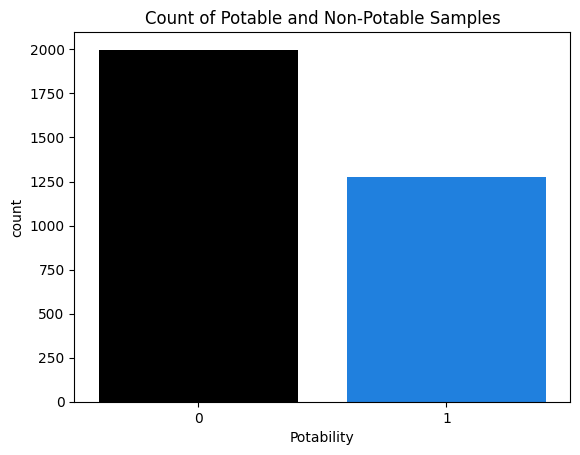



0    1998
1    1278
Name: Potability, dtype: int64


In [9]:
sns.countplot(x='Potability', data=axial_dataframe, palette=['black', '#0080FE'])
plt.title('Count of Potable and Non-Potable Samples')
plt.show()

print("\n")

counts = axial_dataframe.Potability.value_counts()
labels = ['0', '1']
print(counts)

<Axes: >

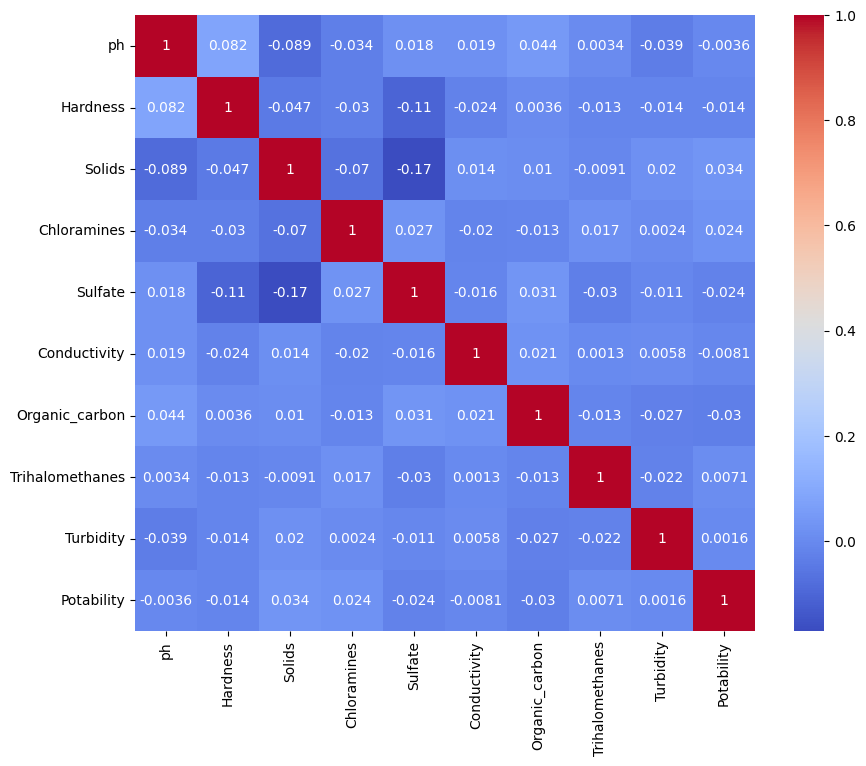

In [10]:
plt.figure(figsize=(10, 8))
sns.heatmap(axial_dataframe.corr(), annot= True, cmap='coolwarm')

In [11]:
axial_dataframe.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [12]:
axial_dataframe.isnull().mean()*100

ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


    ph : 14.98 %
    Sulfate : 23.84 %
    Trihalomethanes : 4.94 %


Size of the X_train: 2293
Accuracy: 65.209%

Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.78      0.74       617
           1       0.54      0.44      0.48       366

    accuracy                           0.65       983
   macro avg       0.62      0.61      0.61       983
weighted avg       0.64      0.65      0.64       983



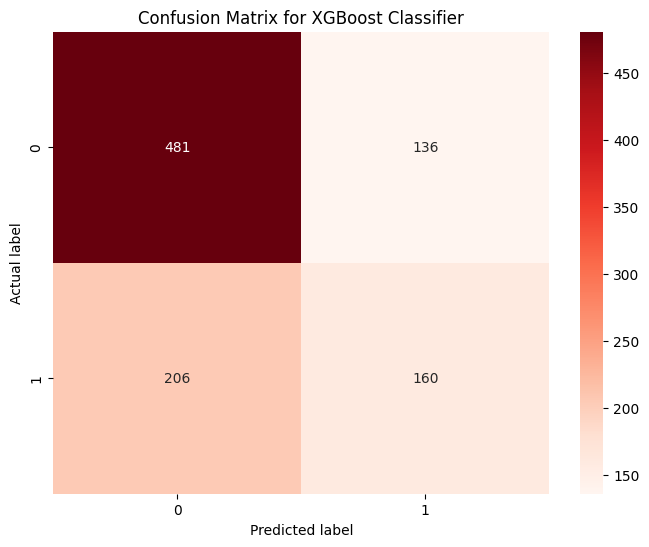

In [13]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def XGBoost_with_missing_values_and_evaluation(df, target_column='Potability', test_size=0.3, random_state=42):

    #_feature_and_target
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    #train-test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    print(f'Size of the X_train: {X_train.shape[0]}')

    #train
    model = XGBClassifier(eval_metric='logloss')
    model.fit(X_train, y_train)

    #pred_eval
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'Accuracy: {round(accuracy * 100.0, 3)}%')

    #report
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))

    #cm_visual
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title('Confusion Matrix for XGBoost Classifier')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return accuracy


accuracy = XGBoost_with_missing_values_and_evaluation(axial_dataframe, 'Potability')


2293 Instances of training data were used in this case.

The accuracy achieved using XGBoost Algorithm with the missing values is 65.20%

Size of the X_train: 2293
Accuracy: 63.581%

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.89      0.75       617
           1       0.53      0.21      0.30       366

    accuracy                           0.64       983
   macro avg       0.59      0.55      0.53       983
weighted avg       0.61      0.64      0.59       983



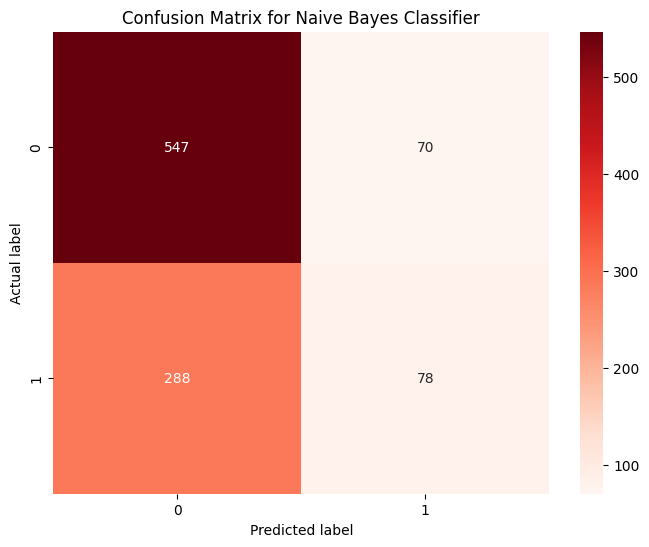

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def NaiveBayes_with_simpleimputer_and_evaluation(df, target_column='Potability', test_size=0.3, random_state=42):



    X = df.drop(target_column, axis=1)
    y = df[target_column]
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=test_size, random_state=random_state)
    print(f'Size of the X_train: {X_train.shape[0]}')

    #_train
    model = GaussianNB()
    model.fit(X_train, y_train)
    #pred
    predictions = model.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    print(f'Accuracy: {round(accuracy * 100.0, 3)}%')
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))
    cm = confusion_matrix(y_test, predictions)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
    plt.title('Confusion Matrix for Naive Bayes Classifier')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return accuracy


accuracy = NaiveBayes_with_simpleimputer_and_evaluation(axial_dataframe, 'Potability')


The above code function utilizes the Naive Bayes Technique with missing values but uses Imputing to get it to run the algo.


In [15]:
axial_dataframe.nunique()

ph                 2785
Hardness           3276
Solids             3276
Chloramines        3276
Sulfate            2495
Conductivity       3276
Organic_carbon     3276
Trihalomethanes    3114
Turbidity          3276
Potability            2
dtype: int64

In [16]:
axial_dataframe['ph'] = axial_dataframe['ph'].fillna(axial_dataframe['ph'].mean())
axial_dataframe['Sulfate'] = axial_dataframe['Sulfate'].fillna(axial_dataframe['Sulfate'].mean())
axial_dataframe['Trihalomethanes'] = axial_dataframe['Trihalomethanes'].fillna(axial_dataframe['Trihalomethanes'].mean())

In the analysis section of our water potability dataset, we addressed the issue of missing values by employing mean imputation. This involved replacing missing values in three key features - 'ph', 'Sulfate', and 'Trihalomethanes' - with their respective mean values. This technique was chosen to maintain the dataset's completeness, enabling a more thorough analysis without discarding data rows.

In [17]:
axial_dataframe.head()

ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0  7.080795  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246  333.775777    592.885359   
2  8.099124  224.236259  19909.541732     9.275884  333.775777    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

<Axes: >

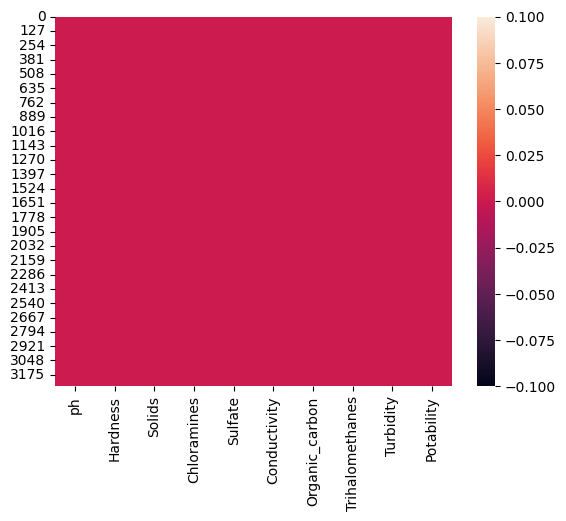

In [18]:
sns.heatmap(axial_dataframe.isnull())

In [19]:
axial_dataframe.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [21]:
X_transform = scaler.fit_transform(axial_dataframe)
X_transform

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
         1.30614943e+00, -1.28629758e+00, -7.99774743e-01],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
        -6.38479983e-01,  6.84217891e-01, -7.99774743e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         1.50940884e-03, -1.16736546e+00, -7.99774743e-01],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
         2.18748247e-01, -8.56006782e-01,  1.25035206e+00],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
         7.03468419e-01,  9.50797383e-01,  1.25035206e+00],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         7.80223466e-01, -2.12445866e+00,  1.25035206e+00]])

Models used:
  1. Logistic Regression
  2. Decision Tree Classifier
  3. k-nearest neighbors algorithm
  4. Support Vector Machines (SVM)
  5. Naive Bayes
  6. XGBoost Classifier

Logistic Regression Accuracy: 0.6195320447609359

Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       610
           1       0.00      0.00      0.00       373

    accuracy                           0.62       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.38      0.62      0.47       983



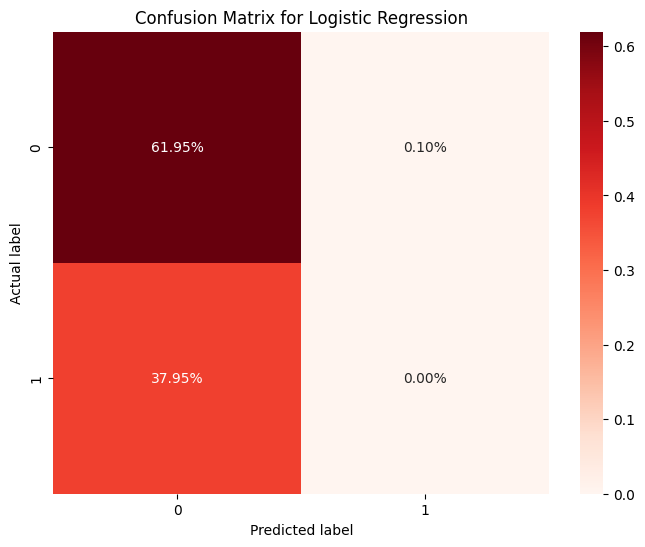

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def LogisticRegression_with_evaluation(df, target_column='Potability', test_size=0.3, random_state=0, max_iter=200, n_jobs=10):

    X = df.drop(target_column, axis=1)
    y = df[target_column]
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=test_size, random_state=random_state)
    model_lg = LogisticRegression(max_iter=max_iter, random_state=random_state, n_jobs=n_jobs)
    model_lg.fit(X_train, y_train)
    pred_lg = model_lg.predict(X_test)
    lg_accuracy = accuracy_score(y_test, pred_lg)
    print(f'Logistic Regression Accuracy: {lg_accuracy}')
    print("\nClassification Report:")
    print(classification_report(y_test, pred_lg))
    cm1 = confusion_matrix(y_test, pred_lg)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm1 / np.sum(cm1), annot=True, fmt='0.2%', cmap='Reds')
    plt.title('Confusion Matrix for Logistic Regression')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return lg_accuracy


accuracy = LogisticRegression_with_evaluation(axial_dataframe)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:1165: UserWarning:

l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l1)



Best Parameters: {'C': 0.0001, 'l1_ratio': 0.0, 'penalty': 'l1', 'solver': 'saga'}
Logistic Regression Accuracy: 0.6205493387589013

Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77       610
           1       0.00      0.00      0.00       373

    accuracy                           0.62       983
   macro avg       0.31      0.50      0.38       983
weighted avg       0.39      0.62      0.48       983



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



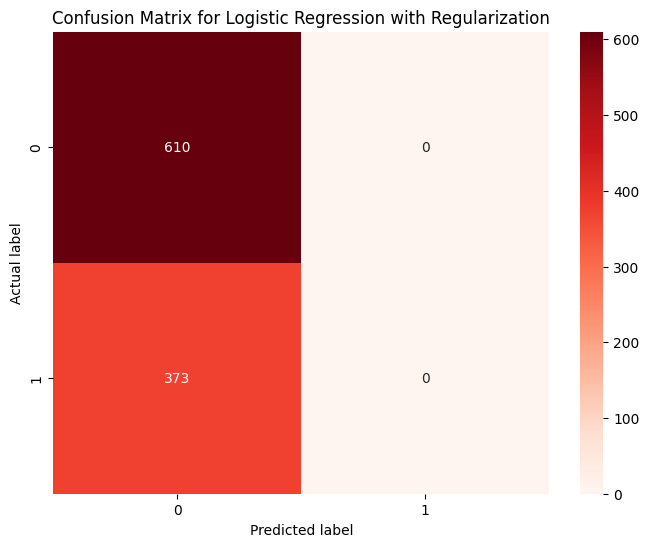

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def LogisticRegression_with_evaluation_and_regularization(df, target_column='Potability', test_size=0.3, random_state=0, n_jobs=10):

    X = df.drop(target_column, axis=1)
    y = df[target_column]
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=test_size, random_state=random_state)
    #_def_model
    model_lg = LogisticRegression(random_state=random_state, n_jobs=n_jobs)
    #hyperparameter_grid
    param_grid = {
        'penalty': ['l1', 'l2', 'elasticnet'],
        'C': np.logspace(-4, 4, 10),  #reduced number of values for C for efficiency
        'solver': ['saga']
    }

    if 'elasticnet' in param_grid['penalty']:
        param_grid['l1_ratio'] = np.linspace(0, 1, 10)

    #fit the grid search to the data with a specified max_iter
    grid_search = GridSearchCV(model_lg, param_grid, cv=5, scoring='accuracy', verbose=0, n_jobs=n_jobs)
    grid_search.fit(X_train, y_train)
    best_params = grid_search.best_params_
    best_model_lg = LogisticRegression(max_iter=1000, **best_params)  # increased max_iter for convergence
    best_model_lg.fit(X_train, y_train)
    pred_lg = best_model_lg.predict(X_test)
    lg_accuracy = accuracy_score(y_test, pred_lg)
    print(f'Best Parameters: {best_params}')
    print(f'Logistic Regression Accuracy: {lg_accuracy}')
    print("\nClassification Report:")
    print(classification_report(y_test, pred_lg))
    cm1 = confusion_matrix(y_test, pred_lg)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm1, annot=True, fmt='d', cmap='Reds')
    plt.title('Confusion Matrix for Logistic Regression with Regularization')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return lg_accuracy, best_params


accuracy, best_params = LogisticRegression_with_evaluation_and_regularization(axial_dataframe)


Decision Tree Accuracy: 0.6490335707019329

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.89      0.76       617
           1       0.57      0.24      0.34       366

    accuracy                           0.65       983
   macro avg       0.62      0.57      0.55       983
weighted avg       0.63      0.65      0.60       983



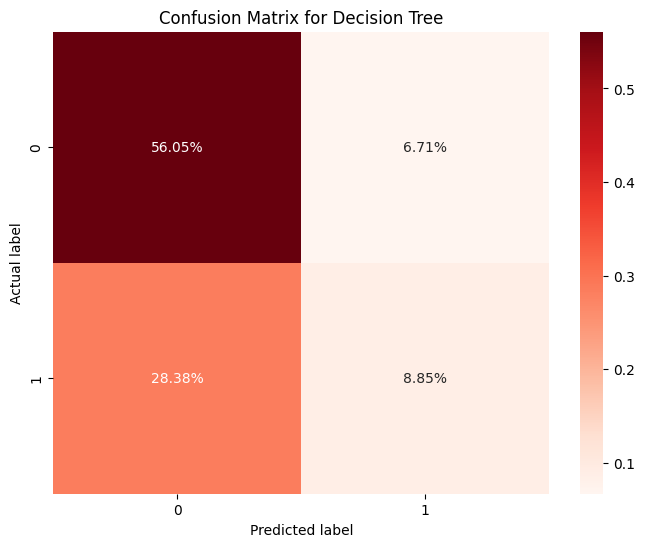

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def DecisionTree_with_evaluation(df, target_column='Potability', test_size=0.3, random_state=42, max_depth=4):
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    #handle_missing_values
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=test_size, random_state=random_state)
    model_dt = DecisionTreeClassifier(max_depth=max_depth, random_state=random_state)
    model_dt.fit(X_train, y_train)
    pred_dt = model_dt.predict(X_test)
    dt_accuracy = accuracy_score(y_test, pred_dt)
    print(f'Decision Tree Accuracy: {dt_accuracy}')
    print("\nClassification Report:")
    print(classification_report(y_test, pred_dt))
    cm2 = confusion_matrix(y_test, pred_dt)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm2 / np.sum(cm2), annot=True, fmt='0.2%', cmap='Reds')
    plt.title('Confusion Matrix for Decision Tree')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return dt_accuracy


accuracy = DecisionTree_with_evaluation(df=axial_dataframe, target_column='Potability')

Fitting 5 folds for each of 63 candidates, totalling 315 fits
Optimized Decision Tree Accuracy: 0.6490335707019329
Best Parameters: {'max_depth': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.89      0.76       617
           1       0.57      0.24      0.34       366

    accuracy                           0.65       983
   macro avg       0.62      0.57      0.55       983
weighted avg       0.63      0.65      0.60       983



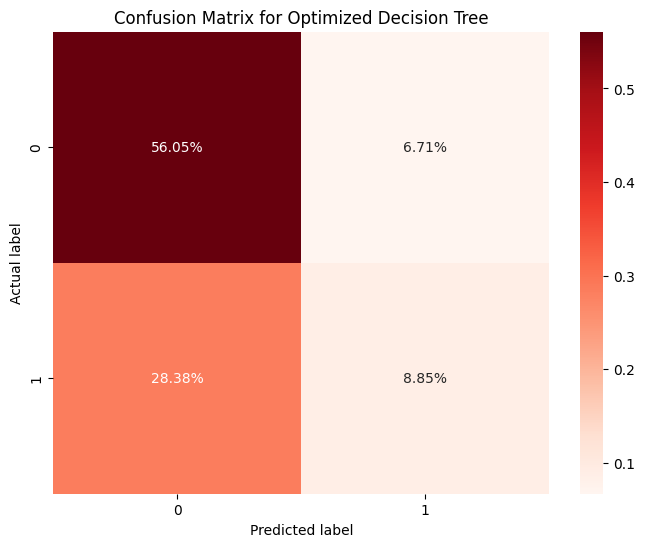

In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def DecisionTree_with_optimized_evaluation(df, target_column='Potability', test_size=0.3, random_state=42):

    X = df.drop(target_column, axis=1)
    y = df[target_column]
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=test_size, random_state=random_state)
    param_grid = {
        'max_depth': [3, 4, 5, 6, 7, 8, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }


    model_dt = DecisionTreeClassifier(random_state=random_state)
    grid_search = GridSearchCV(model_dt, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train, y_train)
    best_model_dt = grid_search.best_estimator_
    pred_dt = best_model_dt.predict(X_test)
    dt_accuracy = accuracy_score(y_test, pred_dt)
    print(f'Optimized Decision Tree Accuracy: {dt_accuracy}')
    print(f'Best Parameters: {grid_search.best_params_}')
    print("\nClassification Report:")
    print(classification_report(y_test, pred_dt))
    cm2 = confusion_matrix(y_test, pred_dt)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm2 / np.sum(cm2), annot=True, fmt='0.2%', cmap='Reds')
    plt.title('Confusion Matrix for Optimized Decision Tree')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return dt_accuracy, grid_search.best_params_


accuracy, best_params = DecisionTree_with_optimized_evaluation(df=axial_dataframe, target_column='Potability')


XGBoost Classifier Accuracy: 0.681586978636826
              precision    recall  f1-score   support

           0       0.69      0.90      0.78       610
           1       0.66      0.33      0.44       373

    accuracy                           0.68       983
   macro avg       0.67      0.61      0.61       983
weighted avg       0.68      0.68      0.65       983



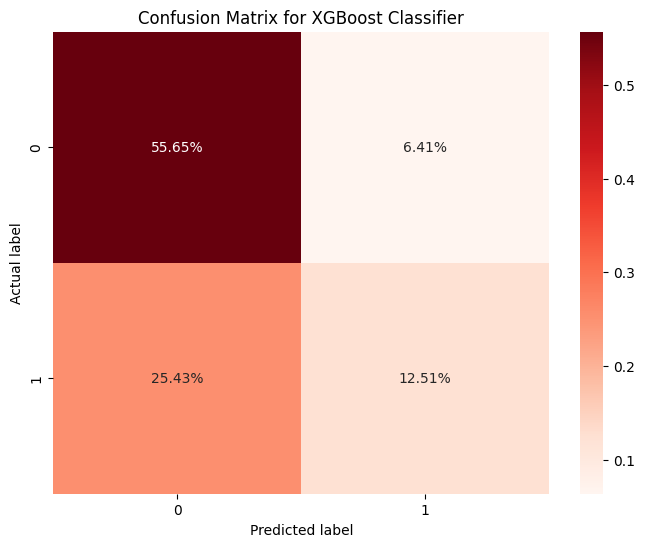

In [26]:
#XGBClassifier

from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def train_and_evaluate_xgb(df, target_column='Potability', test_size=0.3, random_state=0, max_depth=8, n_estimators=125, learning_rate=0.03, n_jobs=5):

    X = df.drop(target_column, axis=1)
    y = df[target_column]
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=test_size, random_state=random_state)
    model_xgb = XGBClassifier(max_depth=max_depth, n_estimators=n_estimators, random_state=random_state, learning_rate=learning_rate, n_jobs=n_jobs, eval_metric='logloss')
    model_xgb.fit(X_train, y_train)
    pred_xgb = model_xgb.predict(X_test)
    xgb_accuracy = accuracy_score(y_test, pred_xgb)
    print(f'XGBoost Classifier Accuracy: {xgb_accuracy}')
    print(classification_report(y_test, pred_xgb))
    cm4 = confusion_matrix(y_test, pred_xgb)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm4 / np.sum(cm4), annot=True, fmt='0.2%', cmap='Reds')
    plt.title('Confusion Matrix for XGBoost Classifier')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return xgb_accuracy


accuracy = train_and_evaluate_xgb(df=axial_dataframe, target_column='Potability')


Improved XGBoost Classifier with optimization and better hyperparameters

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Optimized XGBoost Classifier Accuracy: 0.6826042726347915
Best Parameters: {'subsample': 0.9, 'n_estimators': 100, 'max_depth': 6, 'learning_rate': 0.05, 'gamma': 0.1, 'colsample_bytree': 0.8}

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.91      0.78       610
           1       0.67      0.32      0.43       373

    accuracy                           0.68       983
   macro avg       0.68      0.61      0.61       983
weighted avg       0.68      0.68      0.65       983



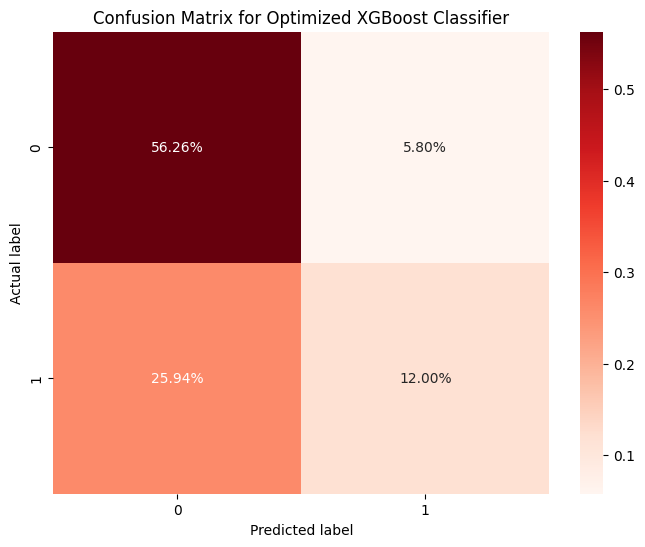

In [27]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def train_and_optimize_xgb(df, target_column='Potability', test_size=0.3, random_state=0):

    X = df.drop(target_column, axis=1)
    y = df[target_column]
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_imputed)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=test_size, random_state=random_state)
    param_grid = {
        'max_depth': [3, 4, 5, 6],
        'n_estimators': [100, 125, 150],
        'learning_rate': [0.01, 0.03, 0.05],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9],
        'gamma': [0, 0.1, 0.2]
    }


    model_xgb = XGBClassifier(random_state=random_state, n_jobs=-1, eval_metric='logloss')
    random_search = RandomizedSearchCV(model_xgb, param_grid, n_iter=100, scoring='accuracy', n_jobs=-1, cv=5, random_state=random_state, verbose=1)
    random_search.fit(X_train, y_train)
    best_model_xgb = random_search.best_estimator_
    pred_xgb = best_model_xgb.predict(X_test)
    xgb_accuracy = accuracy_score(y_test, pred_xgb)
    print(f'Optimized XGBoost Classifier Accuracy: {xgb_accuracy}')
    print(f'Best Parameters: {random_search.best_params_}')
    print("\nClassification Report:")
    print(classification_report(y_test, pred_xgb))
    cm4 = confusion_matrix(y_test, pred_xgb)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm4 / np.sum(cm4), annot=True, fmt='0.2%', cmap='Reds')
    plt.title('Confusion Matrix for Optimized XGBoost Classifier')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return xgb_accuracy, random_search.best_params_

accuracy, best_params = train_and_optimize_xgb(df=axial_dataframe, target_column='Potability')


K-Nearest Neighbors Classifier Accuracy: 0.5788402848423194
              precision    recall  f1-score   support

           0       0.63      0.79      0.70       610
           1       0.41      0.24      0.30       373

    accuracy                           0.58       983
   macro avg       0.52      0.51      0.50       983
weighted avg       0.54      0.58      0.55       983



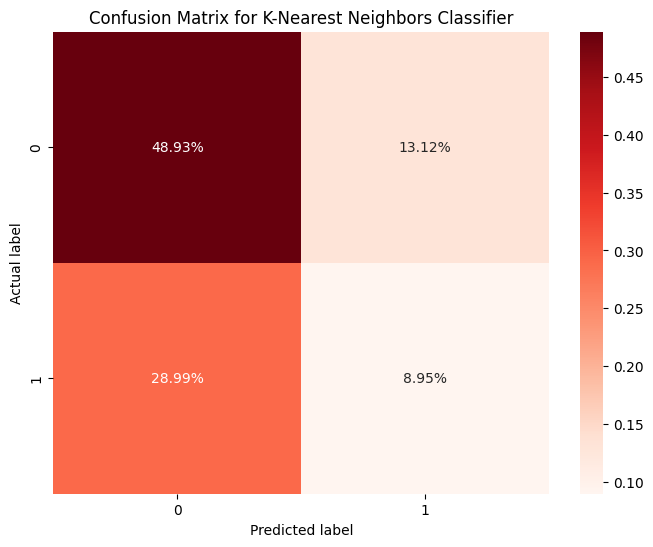

In [28]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def train_and_evaluate_knn(df, target_column='Potability', test_size=0.3, random_state=0, n_neighbors=9, leaf_size=20):

    X = df.drop(target_column, axis=1)
    y = df[target_column]
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=test_size, random_state=random_state)
    model_kn = KNeighborsClassifier(n_neighbors=n_neighbors, leaf_size=leaf_size)
    model_kn.fit(X_train, y_train)
    pred_kn = model_kn.predict(X_test)
    kn_accuracy = accuracy_score(y_test, pred_kn)
    print(f'K-Nearest Neighbors Classifier Accuracy: {kn_accuracy}')
    print(classification_report(y_test, pred_kn))
    cm5 = confusion_matrix(y_test, pred_kn)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm5 / np.sum(cm5), annot=True, fmt='0.2%', cmap='Reds')
    plt.title('Confusion Matrix for K-Nearest Neighbors Classifier')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return kn_accuracy


accuracy = train_and_evaluate_knn(df=axial_dataframe, target_column='Potability')


To optimize the K-Nearest Neighbors (KNN) classifier and potentially improve accuracy, you can implement hyperparameter tuning using techniques such as grid search or randomized search. Additionally, scaling the features and handling class imbalance (if it exists) can also improve performance.

The following code presents an enhanced version of the previous function that includes hyperparameter tuning and feature scaling.

This function now includes a GridSearchCV to find the best hyperparameters within the provided ranges and uses StandardScaler for feature scaling. This should help to improve the accuracy of the KNN classifier.

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Best Parameters: {'leaf_size': 20, 'metric': 'euclidean', 'n_neighbors': 17, 'weights': 'uniform'}
K-Nearest Neighbors Classifier Accuracy: 0.6602238046795524
              precision    recall  f1-score   support

           0       0.67      0.89      0.76       610
           1       0.61      0.28      0.39       373

    accuracy                           0.66       983
   macro avg       0.64      0.59      0.58       983
weighted avg       0.65      0.66      0.62       983



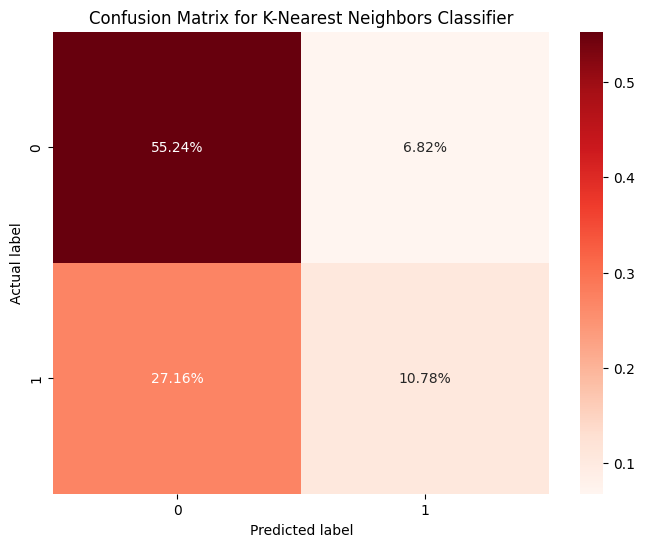

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def train_and_evaluate_knn(df, target_column='Potability', test_size=0.3, random_state=0):

    X = df.drop(target_column, axis=1)
    y = df[target_column]
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=test_size, random_state=random_state)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    param_grid = {
        'n_neighbors': range(1, 30, 2),
        'leaf_size': range(20, 40, 5),
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    knn = KNeighborsClassifier()
    grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)
    grid_search.fit(X_train_scaled, y_train)
    model_kn = grid_search.best_estimator_
    pred_kn = model_kn.predict(X_test_scaled)
    kn_accuracy = accuracy_score(y_test, pred_kn)
    print(f'Best Parameters: {grid_search.best_params_}')
    print(f'K-Nearest Neighbors Classifier Accuracy: {kn_accuracy}')
    print(classification_report(y_test, pred_kn))
    cm5 = confusion_matrix(y_test, pred_kn)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm5 / np.sum(cm5), annot=True, fmt='0.2%', cmap='Reds')
    plt.title('Confusion Matrix for K-Nearest Neighbors Classifier')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return kn_accuracy, grid_search.best_params_

accuracy, best_params = train_and_evaluate_knn(df=axial_dataframe, target_column='Potability')


SVM Classifier Accuracy: 0.6276703967446592
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       617
           1       0.00      0.00      0.00       366

    accuracy                           0.63       983
   macro avg       0.31      0.50      0.39       983
weighted avg       0.39      0.63      0.48       983



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



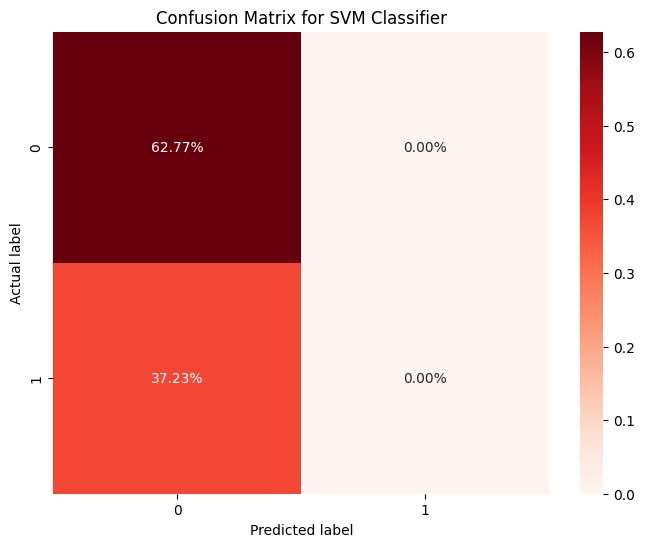

In [30]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

def train_and_evaluate_svm(df, target_column='Potability', test_size=0.3, random_state=42):

    X = df.drop(target_column, axis=1)
    y = df[target_column]
    imputer = SimpleImputer(strategy='mean')
    X_imputed = imputer.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=test_size, random_state=random_state)

    #creating model object
    model_svm = SVC(kernel='rbf', random_state=random_state)
    model_svm.fit(X_train, y_train)
    #pred
    pred_svm = model_svm.predict(X_test)
    svm_accuracy = accuracy_score(y_test, pred_svm)
    print(f'SVM Classifier Accuracy: {svm_accuracy}')
    print(classification_report(y_test, pred_svm))
    cm6 = confusion_matrix(y_test, pred_svm)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm6 / np.sum(cm6), annot=True, fmt='0.2%', cmap='Reds')
    plt.title('Confusion Matrix for SVM Classifier')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

    return svm_accuracy

accuracy = train_and_evaluate_svm(df=axial_dataframe, target_column='Potability')


In [31]:
axial_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               3276 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          3276 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3276 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [32]:
#Naive Bayes with optimizations
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.impute import SimpleImputer
import pandas as pd

def NaiveBayes_with_improvements(df, target_column='Potability', test_size=0.3, random_state=42, impute_strategy='mean'):
    X = df.drop(target_column, axis=1)
    y = df[target_column]

    # Handling missing values
    imputer = SimpleImputer(strategy=impute_strategy)
    X_imputed = imputer.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=test_size, random_state=random_state)

    model = GaussianNB()
    # Evaluate using cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print(f'Cross-Validation Accuracy Scores: {cv_scores}')
    print(f'Average CV Accuracy: {round(cv_scores.mean() * 100, 3)}%')

    # Final evaluation on the test set
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)
    print(f'Test Accuracy: {round(accuracy * 100.0, 3)}%')
    print("\nClassification Report:")
    print(classification_report(y_test, predictions))

    return accuracy


accuracy = NaiveBayes_with_improvements(axial_dataframe, 'Potability', impute_strategy='median')


Cross-Validation Accuracy Scores: [0.62962963 0.62091503 0.59259259 0.61353712 0.61790393]
Average CV Accuracy: 61.492%
Test Accuracy: 63.581%

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.89      0.75       617
           1       0.53      0.21      0.30       366

    accuracy                           0.64       983
   macro avg       0.59      0.55      0.53       983
weighted avg       0.61      0.64      0.59       983



This new function uses different Imputation Strategies:

  The function now accepts an impute_strategy parameter, allowing you to choose different strategies for handling missing values, such as 'mean', 'median', or 'most_frequent' (mode). Different datasets might benefit from different imputation methods, depending on the nature of their missing data.

Cross-Validation:

  Instead of evaluating the model on a single train-test split, the function now uses cross-validation (cross_val_score) with 5 folds. This provides a better estimate of the model's performance by averaging its accuracy across multiple subsets of the data. Cross-validation helps in assessing the model's ability to generalize to unseen data.

Final Evaluation on Test Set:

  After cross-validation, the model is trained on the entire training set and then evaluated on the test set. This step ensures that the final performance metric (accuracy) reflects the model's ability to predict new, unseen data.